<a href="https://colab.research.google.com/github/lisosoma/BI_STATISTICS/blob/main/bi_hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import scipy
import math
import itertools
from scipy.special import zeta
from math import pi, sin, cos, sqrt, exp

##### Задача 1.a.

In [ ]:
def ex1a(s = 1):
    p = 15519504 / 55835135                        # заданная в условии константа
    prob = [p / i for i in range(1, 21)]           # список со значениями функции вероятности p(xi = N)
    cumprob = list(itertools.accumulate(prob))     # список со значениями функции распределения p(xi <= N)
    
    uniform = sts.uniform.rvs(loc=0, scale=1, size=s, random_state=None)     # моделируем список случайных величин,
                                                                             # имеющих равномерное распределение на [0, 1]
        
    distrib = []       # в данном списке будем хранить значения случайных величин из распределения F (для 1.a)
    for i in range(s):
        for j in range(19):
            if uniform[i] <= cumprob[j + 1] and uniform[i] > cumprob[j]:     # если случайная величина из равномерного
                                                                             # распределения попадает в интервал
                distrib.append(j + 2)                                        # добавляем в список m = j + 2 (как в лекциях)
        if uniform[i] <= cumprob[0]:                                         # условие для крайнего значения
            distrib.append(1)
    return distrib

Для задачи 3.а сразу смоделируем выборку необходимого размера.

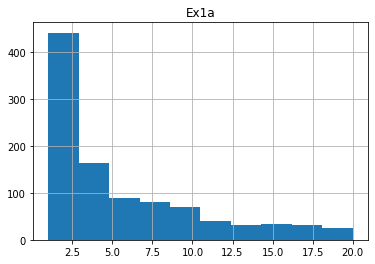

In [ ]:
distrib1 = ex1a(1000)
df1 = pd.DataFrame({'Ex1a' : distrib1})
h_1 = df1.hist()

##### Задача 1.b.

In [ ]:
def ex1b(s = 1):
    C = 1 / zeta(3, 1)     # zeta() - дзета-функция Римана для нормировки
    
    uniform = sts.uniform.rvs(loc=0, scale=1, size=s, random_state=None)      # моделируем список случайных величин,
                                                                              # имеющих равномерное распределение на [0, 1]
        
    distrib = []           # в данном списке будем хранить значения случайных величин из распределения F
    for i in range(s):     
        cumsum, r = C, C
        N = 1
        while(uniform[i] > cumsum):    # поиск интервала, в который должна 
                                       # попасть равномерно распределенная случайная величина
            N += 1                     # делаем пересчет вероятностей и частичных сумм
            r = C / N ** 3
            cumsum += r
        distrib.append(N)              # добавляем случайную величину в список
    return distrib

Для задачи 3.b сразу смоделируем выборку необходимого размера.

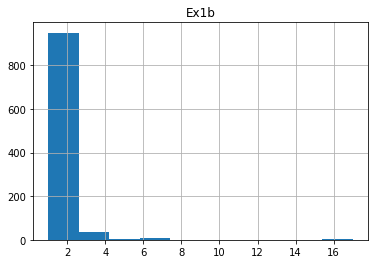

In [ ]:
distrib2 = ex1b(1000)
df2 = pd.DataFrame({'Ex1b' : distrib2})
h_2 = df2.hist()

##### Задача 2.a.

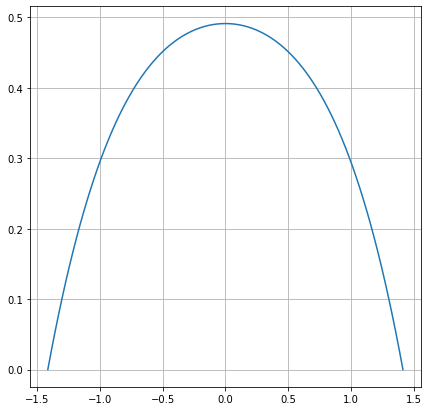

In [ ]:
q = lambda x : 5 / 72 / sqrt(2) * (-x ** 4 - 3 * x  ** 2 + 10)          # плотность распределения (в условии p(x))
        
x = np.linspace(-math.sqrt(2), math.sqrt(2), 100)
q_list = [q(x[i]) for i in range(100)]                                  

plt.figure(figsize=(7, 7))
plt.plot(x, q_list)
plt.grid()

In [ ]:
def ex2a(s = 1):
    M = 50 / 72 / sqrt(2)
    
    distrib = []                  # список, где будут храниться значения случайной 
                                  # величины из распределения с плотностью q(x)   
        
    while(len(distrib) < s):      # пока размер списка не достигнет необходимого объема выборки
        
        uniform1 = sts.uniform.rvs(loc=0, scale=1, size=1, random_state=None)      # генерируем св ~ U[0, 1]
        uniformb = sts.uniform.rvs(loc=0, scale=1, size=1, random_state=None)      # генерируем еще одну такую же св
                                                                                   # она служит для того, чтобы определить
                                                                                   # знак св uniform1 
                
        if uniformb >= 1 / 2:      # определяем знак, таким образом получаем uniform1' ~ U[-1, 1]
            uniform1 *= -1
            
        uniform2 = sts.uniform.rvs(loc=0, scale=1, size=1, random_state=None)      # генерируем еще одну св ~ U[0, 1]
        if uniform2 * M <= q(uniform1 * math.sqrt(2)):                             # проверяем условие того, что
                                                                                   # если uniform2 *  M ~ U[0, M]
                                                                                   # коордианата y точки с координатой
                                                                                   # x = uniform1'', которая попадает
                                                                                   # под график q(x), то тогда искомая
            distrib.append(float(uniform1 * math.sqrt(2)))                         # св равна uniform1''
    return distrib

Для задачи 3.c сразу смоделируем выборку необходимого размера.

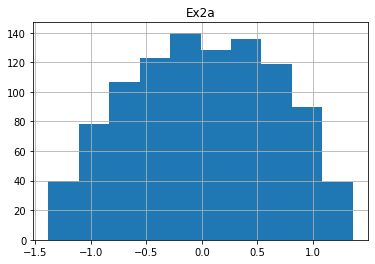

In [ ]:
distrib3 = ex2a(1000)
df3 = pd.DataFrame({'Ex2a' : distrib3})
h_3 = df3.hist()

##### Задача 2.b.

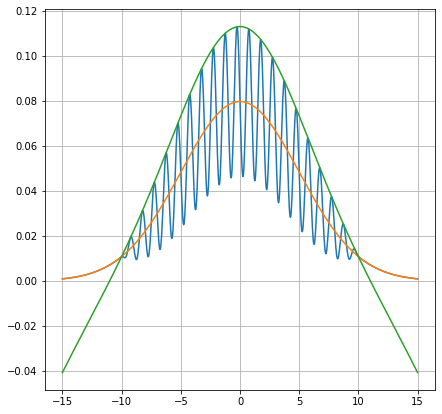

In [ ]:
def q2(x):   # плотность распределения св, которую нужно смоделировать
    if x < 10 and x > -10:
        return (math.exp(-x ** 2 / 50) / 5 / math.sqrt(2 * pi) +
                (x ** 2 - 10 ** 2) * math.sin(2 * pi * x) / 3000)
    else:
        return math.exp(-x ** 2 / 50) / 5 / math.sqrt(2 * pi)
    
p2 = lambda x: math.exp(-x ** 2 / 2 / 25) / 5 / math.sqrt(2 * pi)   # вспомогательные функции
                                                                    # для нахождения супремума r(x)
z = lambda x: math.exp(-x ** 2 / 50) / 5 / math.sqrt(2 * pi) - (x ** 2 - 10 ** 2) / 3000

def f_p2(s = 1):    # моделирование св ~ N(0, 25) методом обратных функций
    uniform = sts.uniform.rvs(loc=0, scale=1, size=s, random_state=None)
    distrib = []
    for x in uniform:
        distrib.append(float(sts.norm.ppf(q = x, loc=0, scale=5)))
    return distrib
    
x2 = np.linspace(-15, 15, 1000)
q2_plot = [q2(x2[i]) for i in range(1000)]
p2_plot = [p2(x2[i]) for i in range(1000)]
z_plot = [z(x2[i]) for i in range(1000)]

plt.figure(figsize=(7, 7))
plt.plot(x2, q2_plot)
plt.plot(x2, p2_plot)
plt.plot(x2, z_plot)
plt.grid()

In [ ]:
def ex2b(s = 1):
    M = z(0) / p2(0)              # супремум отношения q(x) / p(x)
    distrib = []                  # список, где будут храниться значения случайной 
                                  # величины из распределения с плотностью q(x)   
        
    while(len(distrib) < s):      # пока размер списка не достигнет необходимого объема выборки
        
        uniform1 = sts.uniform.rvs(loc=0, scale=1, size=1, random_state=None)      # генерируем св ~ U[0, 1]             
        normal1 = f_p2(1)
        if uniform1 * M < q2(float(normal1[0])) / p2(float(normal1[0])):
            distrib.append(float(normal1[0]))
    return distrib

Для задачи 3.d сразу смоделируем выборку необходимого размера.

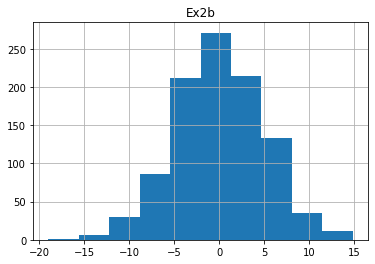

In [ ]:
distrib4 = ex2b(1000)
df4 = pd.DataFrame({'Ex2b' : distrib4})
h_4 = df4.hist()

##### Задача 3.а.

In [ ]:
# будет использован критерий хи-квадрат

T_3an = 0
p = 15519504 / 55835135
pn = [p / i for i in range(1, 21)]
v = [0 for i in range(20)]
for x in distrib1:
    v[x - 1] += 1
for i in range(20):
    v[i] /= 1000
for i in range(20):
    T_3an += (v[i] - pn[i]) ** 2 / pn[i]

if T_3an >= sts.chi.ppf(q = 0.95, df = 19):
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')

Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05


##### Задача 3.b.

In [ ]:
# будет использован критерий хи-квадрат

T_3bn = 0
C = 1 / zeta(3, 1)
pr = [C / (i ** 3) for i in range(1, 5)]
pr.append(1 - sum(pr))
v2 = [0 for i in range(5)]
for x in distrib2:
    if x <= 4:
        v2[x - 1] += 1
    else:
        v2[4] += 1
for i in range(5):
    v2[i] /= 1000
for i in range(5):
    T_3bn += (v2[i] - pr[i]) ** 2 / pr[i]

if T_3bn >= sts.chi.ppf(q = 0.95, df = 4):
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')

Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05


##### Задача 3.с.

In [ ]:
# будет использован критерий Колмогорова

Q = lambda x: 5 / 72 / math.sqrt(2) * (-x ** 5 / 5 - x  ** 3 + 10 * x) + 1 / 2

distrib3.sort()

F_t3c = [Q(x) for x in distrib3]           # теореттическая функция распределения
F_e3c = [0 for x in distrib3]              # эмпирическая функция распределения

for i in range(1000):
    j = 0
    while((distrib3[j] <= distrib3[i]) and j < 999):
        F_e3c[i] += 1
        j += 1
    F_e3c[i] /= 1000
    
D_n3c = [abs(F_e3c[i] - F_t3c[i]) for i in range(1000)]
T_n3c = math.sqrt(1000) * max(D_n3c)            # статистика критерия Колмогорова

lambda_3c = 1.36      # квантиль распределения Колмогорова для уровня значимости alpha = 0.05 взят из таблицы

if T_n3c > lambda_3c:
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')

Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05


##### Задача 3.d.

In [ ]:
# будет использован критерий Колмогорова

F_q2 = lambda x: (2 * pi * x  * sin(2 * pi * x) + (1 - 2 * (pi * x) ** 2 + 200 * pi ** 2) *
                  cos(2 * pi * x) - 1) / 12000 / pi ** 3

def Q2(x):    # функция распределения
    if x < 10 and x > -10:
        return sts.norm.cdf(x, loc=0, scale=5) + F_q2(x)
    else:
        return sts.norm.cdf(x, loc=0, scale=5)

distrib4.sort()

F_t3d = [Q2(x) for x in distrib4]          # теореттическая функция распределения
F_e3d = [0 for x in distrib4]              # эмпирическая функция распределения

for i in range(1000):
    j = 0
    while((distrib4[j] <= distrib4[i]) and j < 999):
        F_e3d[i] += 1
        j += 1
    F_e3d[i] /= 1000
    
D_n3d = [abs(F_e3d[i] - F_t3d[i]) for i in range(1000)]
T_n3d = math.sqrt(1000) * max(D_n3d)            # статистика критерия Колмогорова

lambda_3d = 1.36      # квантиль распределения Колмогорова для уровня значимости alpha = 0.05 взят из таблицы

if T_n3d > lambda_3d:
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')

Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05


##### Задача 4.

In [ ]:
q4 = lambda x : 15 / 236 / sqrt(2) * (-x ** 4 - 2 * x  ** 2 + 10)    # плотность распределения (в условии p(x))

def ex4(s = 1):
    M = 150 / 236 / sqrt(2)  
    
    distrib = []                  # список, где будут храниться значения случайной 
                                  # величины из распределения с плотностью q(x)   
        
    while(len(distrib) < s):      # пока размер списка не достигнет необходимого объема выборки
        
        uniform1 = sts.uniform.rvs(loc=0, scale=1, size=1, random_state=None)      # генерируем св ~ U[0, 1]
        uniformb = sts.uniform.rvs(loc=0, scale=1, size=1, random_state=None)      # генерируем еще одну такую же св
                                                                                   # она служит для того, чтобы определить
                                                                                   # знак св uniform1 
                
        if uniformb >= 1 / 2:      # определяем знак, таким образом получаем uniform1' ~ U[-1, 1]
            uniform1 *= -1
            
        uniform2 = sts.uniform.rvs(loc=0, scale=1, size=1, random_state=None)      # генерируем еще одну св ~ U[0, 1]
        if uniform2 * M <= q4(uniform1 * math.sqrt(2)):                            # проверяем условие того, что
                                                                                   # если uniform2 *  M ~ U[0, M]
                                                                                   # коордианата y точки с координатой
                                                                                   # x = uniform1'', которая попадает
                                                                                   # под график q(x), то тогда искомая
            distrib.append(float(uniform1 * math.sqrt(2)))                         # св равна uniform1''
    return distrib

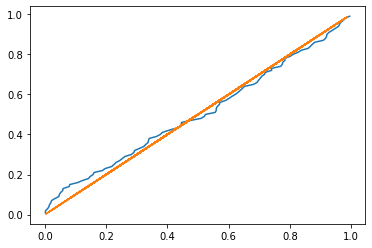

In [ ]:
distrib5 = [ex4(100) for i in range(100)]       # генерируем 100 выоборок размером 100

T = []

for k in range(100):
    distrib5[k].sort()

    F_t4 = [Q(x) for x in distrib5[k]]           # теореттическая функция распределения
    F_e4 = [0 for x in distrib5[k]]              # эмпирическая функция распределения

    for i in range(100):
        j = 0
        while((distrib5[k][j] <= distrib5[k][i]) and j < 99):
            F_e4[i] += 1
            j += 1
        F_e4[i] /= 100
    
    D_n4 = [abs(F_e4[i] - F_t4[i]) for i in range(100)]
    T_n4 = math.sqrt(100) * max(D_n4)            # статистика критерия Колмогорова
    T.append(T_n4)
    
K = [1 - scipy.special.kolmogorov(t) for t in T] # находим значения p-value исходя из полученных статистик критерия
K.sort()
F_e4 = [0 for x in K]   # эмпирическая функция распределения p-value                         

for i in range(100):
    j = 0
    while((K[j] <= K[i]) and j < 99):
        F_e4[i] += 1
        j += 1
    F_e4[i] /= 100
    
U = sts.uniform.rvs(loc=0, scale=1, size=75, random_state=None)    # в случае, если H_0 верна, 
                                                                   # p-value распределено равномерно
F_U = [sts.uniform.cdf(x = u, loc=0, scale=1) for u in U]
plt.plot(K, F_e4)    # график эмпирической функции распределения p-value
plt.plot(U, F_U)     # график теоретической функции распределения p-value при верной H_0
None

In [ ]:
for i in range(100):
# для заданного уровня значимости 0.05
# по эмпирической функции распределения p-value
# найдем, чему примерно равна ошибка второго рода

    if K[i] > 0.045 and K[i] < 0.055:     
        print('Оценка ошибки второго рода для уровня значимости 0.05 равна', 1 - F_e4[i])
        break

Оценка ошибки второго рода для уровня значимости 0.05 равна 0.9299999999999999


##### Задача 5.

Генерируем выборки размера 100 (100 выборок для каждого из четырех распределений)

In [ ]:
distrib5_1 = [sts.t.rvs(df = 1, loc=0, scale=1, size=100, random_state=None) for i in range(100)]
distrib5_2 = [sts.t.rvs(df = 2, loc=0, scale=1, size=100, random_state=None) for i in range(100)]
distrib5_3 = [sts.t.rvs(df = 7, loc=0, scale=1, size=100, random_state=None) for i in range(100)]
distrib5_4 = [sts.norm.rvs(loc=0, scale=1, size=100, random_state=None) for i in range(100)]

Функция, которая будет возвращать список со статистиками критерия

In [ ]:
def ecss(array):
    T = []
    for i in range(100):
        S, K = 0, 0
        m = sum(array[i]) / 100
        for j in range(100):
            S += (array[i][j] - m) ** 2
            K += (array[i][j] - m) ** 4
        S /= 100
        k = K / 100 / S ** 2
        t = (k - 6) / sqrt(24 * (100 - 2) * (100 - 3) / (100 + 1) / (100 + 3) / (100 + 5))
        T.append(t)
    return T

Списки со статистиками критерия

In [ ]:
T1 = ecss(distrib5_1)
T2 = ecss(distrib5_2)
T3 = ecss(distrib5_3)
T4 = ecss(distrib5_4)

Списки с p-value

In [ ]:
K1 = [1 - sts.norm.cdf(x = t, loc = 0, scale = 1) for t in T1]
K2 = [1 - sts.norm.cdf(x = t, loc = 0, scale = 1) for t in T2]
K3 = [1 - sts.norm.cdf(x = t, loc = 0, scale = 1) for t in T3]
K4 = [1 - sts.norm.cdf(x = t, loc = 0, scale = 1) for t in T4]

Далее построим эмпирические функции распределения p-value, чтобы оценить ошибку второго рода

In [ ]:
K1.sort()
K2.sort()
K3.sort()
K4.sort()

F_51 = [0 for x in K1]  
F_52 = [0 for x in K2]
F_53 = [0 for x in K3]
F_54 = [0 for x in K4]

for i in range(100):
    j = 0
    while((K1[j] <= K1[i]) and j < 99):
        F_51[i] += 1
        j += 1
    F_51[i] /= 100
    
    j = 0
    while((K2[j] <= K2[i]) and j < 99):
        F_52[i] += 1
        j += 1
    F_52[i] /= 100
    
    j = 0
    while((K3[j] <= K3[i]) and j < 99):
        F_53[i] += 1
        j += 1
    F_53[i] /= 100
    
    j = 0
    while((K4[j] <= K4[i]) and j < 99):
        F_54[i] += 1
        j += 1
    F_54[i] /= 100

Продемонстрируем на графиках эмпирические функции распредлений p-value.

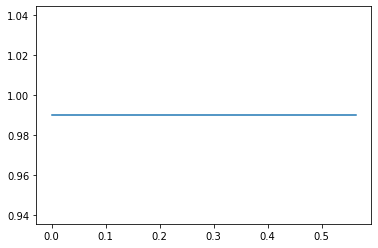

In [ ]:
plt.plot(K1, F_51)
None

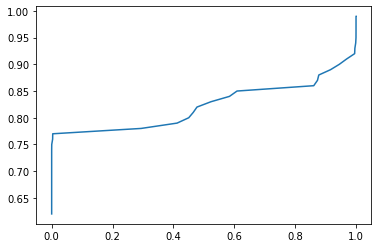

In [ ]:
plt.plot(K2, F_52)
None

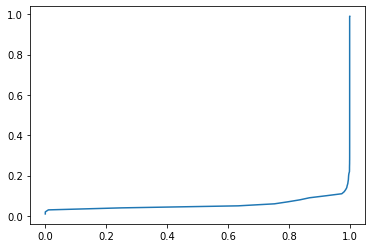

In [ ]:
plt.plot(K3, F_53)
None

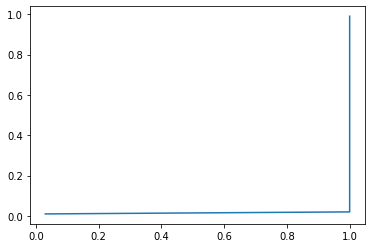

In [ ]:
plt.plot(K4, F_54)
None

Теперь оценим ошибку второго рода.

In [ ]:
print('Оценка ошибки второго для случая с t(1) рода для уровня значимости 0.05 равна', 1 - F_51[0])
print('Оценка ошибки второго для случая с t(2) рода для уровня значимости 0.05 равна', 1 - F_52[30]) 
print('Оценка ошибки второго для случая с t(7) рода для уровня значимости 0.01 равна', 1 - F_53[3])
print('Оценка ошибки второго для случая с Т(0,1) рода для уровня значимости 0.03 равна', 1 - F_53[0])

Оценка ошибки второго для случая с t(1) рода для уровня значимости 0.05 равна 0.010000000000000009
Оценка ошибки второго для случая с t(2) рода для уровня значимости 0.05 равна 0.38
Оценка ошибки второго для случая с t(7) рода для уровня значимости 0.01 равна 0.96
Оценка ошибки второго для случая с Т(0,1) рода для уровня значимости 0.03 равна 0.99


##### Задача 6.

In [ ]:
def distrib7_():
    distrib7 = []
    uni = sts.uniform.rvs(size = 1)    # для случайного определения параметра р
    for i in range(100):
        if uni > 1/2:
            distrib7.append(float(sts.norm.rvs(loc = 1, scale = 2, size = 1)))
        else:
            distrib7.append(float(sts.chi.rvs(df = 9, size = 1)))
    return distrib7

In [ ]:
def ex7(distrib7):
    T = []
    j = 0
    while(len(T) < 100):
        m = sum(distrib7) / 100
        s, A = 0, 0
        for i in range(100):
            s += (distrib7[i] - m) ** 2
            A += (distrib7[i] - m) ** 3
        s /= 100
        A /= 100
        a_e_p = A / sqrt(s) ** 3 / 100
        D_a = 6 * (100 - 2) / (100 + 1) / (100 + 3)
        T_ = a_e_p / sqrt(D_a)
        T.append(T_)
        j += 1
    return T

In [ ]:
d7 = [distrib7_() for i in range(100)]
T = [ex7(list(d7[i])) for i in range(100)]
pv = [1 - sts.norm.cdf(x = t[0], loc = 0, scale = 1) for t in T]
pv.sort()
F_6 = [0 for x in pv]

for i in range(100):
    j = 0
    while((pv[j] <= pv[i]) and j < 99):
        F_6[i] += 1
        j += 1
    F_6[i] /= 100

Эмпирическая функция распределения p-value

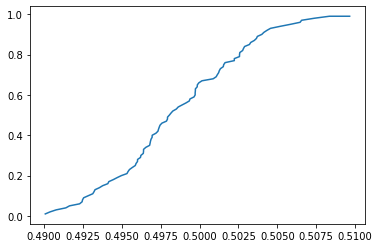

In [ ]:
plt.plot(pv, F_6)
None